In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl , plt
from itertools import product

In [25]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline
raw=pd.read_csv('file:///Users/yashchauhan/Desktop/Quant Trading Project/DRREDDY.NS.csv', parse_dates=True)

In [4]:
data=pd.DataFrame(raw).dropna()
Period=14;
N=data['Date'].count();
s_sma=20;
l_sma=200;

In [7]:
data.reset_index(drop=True, inplace=True)
i=1;
while i<N:
    data.loc[i,'Change']=data.loc[i,'Close']-data.loc[i-1,'Close'];
    i+=1;
data['profit']=np.where(data['Change']>0,data['Change'],0)
data['Loss']=np.where(data['Change']<0,-data['Change'],0)
data['five_d_sharpest_drop']=data['Change'].rolling(5).min();
k=0;
data['sharpest_drop_indicator']=np.where(data['five_d_sharpest_drop']==data['Change'],1,0)
data['average_profit']=data['profit'].rolling(Period).mean()
data['average_loss']=data['Loss'].rolling(Period).mean()
data['rs']=data['average_profit']/data['average_loss']
data['rsi']=100-100/(data['rs']+1)
data['s_sma']=data['Close'].rolling(s_sma).mean();
data['l_sma']=data['Close'].rolling(l_sma).mean();

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Change,profit,Loss,five_d_sharpest_drop,sharpest_drop_indicator,average_profit,average_loss,rs,rsi,s_sma,l_sma
0,2008-05-05,638.000000,645.000000,629.750000,638.950012,577.766296,134804.0,NaN,0.000000,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-05-06,638.950012,652.700012,636.049988,647.849976,585.813965,168615.0,8.899964,8.899964,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-05-07,642.000000,650.000000,636.150024,646.500000,584.593201,61925.0,-1.349976,0.000000,1.349976,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-05-08,637.150024,664.000000,635.049988,661.549988,598.202209,228316.0,15.049988,15.049988,0.000000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-05-09,650.000000,653.750000,627.000000,629.450012,569.176025,213220.0,-32.099976,0.000000,32.099976,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-05-12,621.000000,638.000000,613.000000,631.900024,571.391418,235379.0,2.450012,2.450012,0.000000,-32.099976,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2008-05-13,640.000000,640.000000,622.000000,624.400024,564.609497,130620.0,-7.500000,0.000000,7.500000,-32.099976,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2008-05-14,613.049988,680.000000,613.049988,674.750000,610.138184,776832.0,50.349976,50.349976,0.000000,-32.099976,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2008-05-15,680.200012,685.000000,648.099976,654.599976,591.917603,540647.0,-20.150024,0.000000,20.150024,-32.099976,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-05-16,655.000000,666.000000,646.000000,651.299988,588.933655,252389.0,-3.299988,0.000000,3.299988,-20.150024,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Data=pd.DataFrame(data[['Date','rsi','s_sma','l_sma','sharpest_drop_indicator','Close']])
Data.reset_index(drop=True, inplace=True)
Data['Position']=0;
i=0;
while i<N:
    if Data.loc[i,'rsi']<24 and Data.loc[i,'s_sma']>Data.loc[i,'l_sma']:
        if Data.loc[i,'sharpest_drop_indicator']==1 and i<N:
            Data.loc[i+1,'Position']=1;
            i+=1;
            while i<N:
                if Data.loc[i,'Close']>Data.loc[i,'s_sma'] and i<N:
                    i+=1;
                    break;
                Data.loc[i,'Position']=1;
                i+=1;
    i+=1;
Data['Position']=np.where(Data['Position']==0,-1,1)

In [10]:
Data

,Date,rsi,s_sma,l_sma,sharpest_drop_indicator,Close,Position
0,2008-05-05,NaN,NaN,NaN,0,638.950012,-1
1,2008-05-06,NaN,NaN,NaN,0,647.849976,-1
2,2008-05-07,NaN,NaN,NaN,0,646.500000,-1
3,2008-05-08,NaN,NaN,NaN,0,661.549988,-1
4,2008-05-09,NaN,NaN,NaN,0,629.450012,-1
5,2008-05-12,NaN,NaN,NaN,0,631.900024,-1
6,2008-05-13,NaN,NaN,NaN,0,624.400024,-1
7,2008-05-14,NaN,NaN,NaN,0,674.750000,-1
8,2008-05-15,NaN,NaN,NaN,0,654.599976,-1
9,2008-05-16,NaN,NaN,NaN,0,651.299988,-1


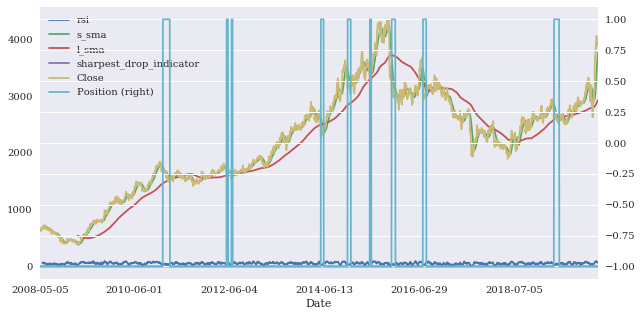

In [11]:
ax=Data.plot(x='Date',secondary_y='Position', figsize=(10,5))

# Returns Calculation

In [16]:
N
m=0;
Data['gain']=0;
while m<N:
    if Data.loc[m,'Position']==1: 
        k=1;j=m;
        while k is not 0:
            if Data.loc[j,'Position']==-1 and j<N:
                Data.loc[j,'gain']=Data.loc[j,'Close']-Data.loc[m,'Close'];
                k=0;
                break;
            if j==N-1:
                k=0;
            j+=1;
    m+=1;
data_returns=pd.DataFrame(Data[['Close','gain']])
data_returns[data_returns['gain']>0]

,Close,gain
686,1578.050049,27.300049
993,1707.000000,32.199951
1017,1609.449951,8.549927
1497,2395.500000,42.600098
1640,3207.250000,43.449951
1748,3425.899902,41.149902
1875,3120.699951,110.699951
2038,3039.800049,30.600098
2739,2654.850098,104.400147


In [17]:
success_trade=data_returns['gain'][data_returns['gain']>0].count();
success_trade

9

In [18]:
loss_trade=data_returns['gain'][data_returns['gain']<0].count();
loss_trade 

0

In [19]:
total_trade=success_trade+loss_trade;
total_trade

9

In [20]:
hit_ratio=success_trade/total_trade;
hit_ratio

1.0

In [21]:
net_return=data_returns['gain'].sum();
net_return

440.95007399999986

# Vectorized backtesting


In [22]:
Data['Returns']=np.log(Data['Close']/Data['Close'].shift(1));
Data['Strategy']= Data['Position'].shift(1)*Data['Returns'];
np.exp(Data[['Returns','Strategy']]);

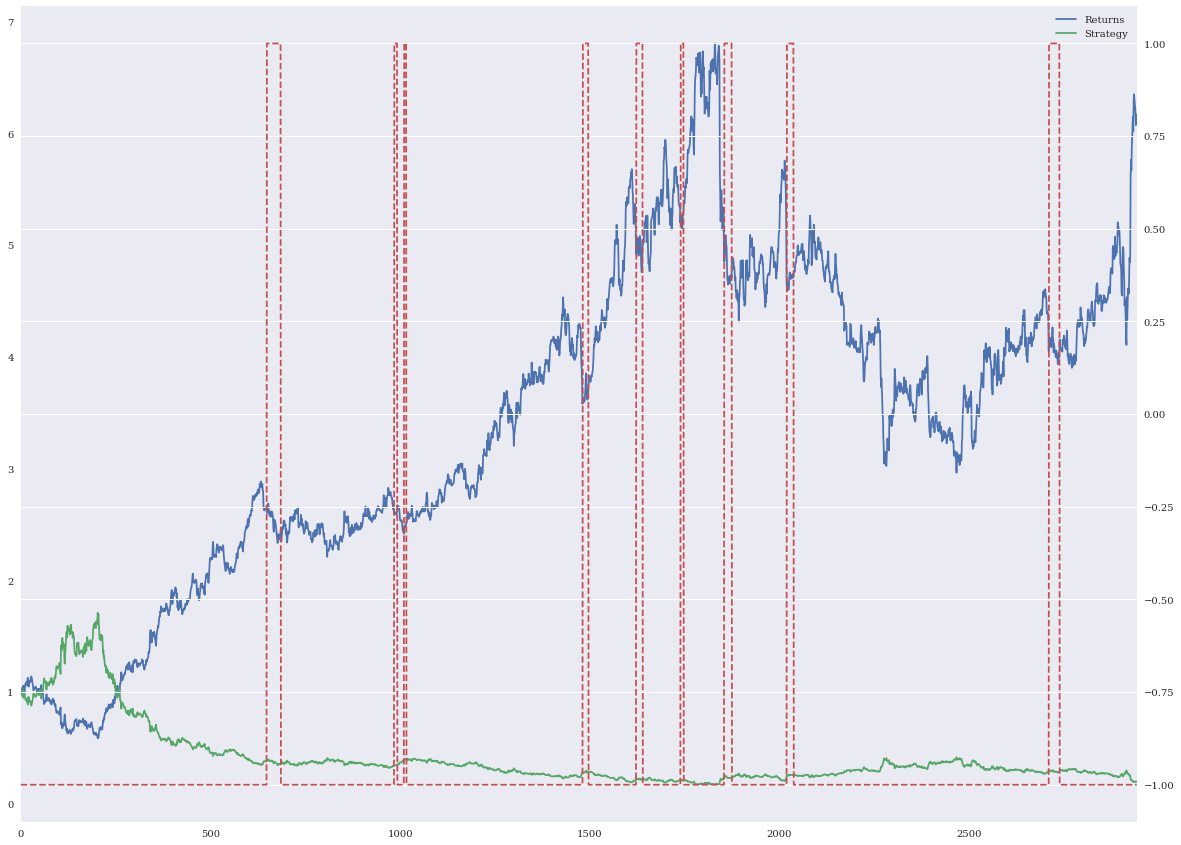

In [23]:
ax=Data[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(20,15))
Data['Position'].plot(ax=ax, secondary_y='Position', style='--')

In [24]:
np.exp(Data[['Returns','Strategy']].sum())

Returns     6.164802
Strategy    0.198109
dtype: float64